# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola, Rodrigo! Excelente trabajo que has hecho al desarrollar la introducción. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
### Para comenzar quisiera tener un feedback sobre mi avance hasta ahora para poder sacer luego las conclusiones o antes de seguir poder arreglar lo que este mal ya que hay algunos ejericicios los cuales no llego a enteender muy bien lo que piden por lo que antes de seguir me gustaria saber si mi a

In [1]:
# importar librerías
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('instacart_orders.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')

In [3]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.<br>
`Los DataFrames están en buen estado general con pocas excepciones que necesitan tratamiento de valores nulos.`<br>
`Los tipos de datos son en su mayoría correctos, aunque hay oportunidades para optimizar el uso de memoria mediante la conversión de algunos tipos de datos.`<br>
`El preprocesamiento de datos se centrará en manejar los valores nulos en days_since_prior_order de orders y product_name de products, y en ajustar los tipos de datos donde sea posible para mejorar la eficiencia.`


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
Segun lo aprendido lo primero que tendre que realizar es un profundo analisis para filtrar los datos en las tablas ya que pueden haber datos duplicados los cuales habria que primero revisar si esos duplicados sirven o no , tambien hay que analizar los datos nulos para poder asi reemplazarlos de ser necesario y por ultimo una vez esos datos ya esten filtrados y ordenados podre realizar los ejercicios propuestos en este proyecto

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

In [8]:
def duplicatesSum(contador , nombreDuplicates):
    if contador > 0:
        print(f"Hay {contador} filas duplicadas de {nombreDuplicates}")
    else:
        print(f"No hay filas duplicadas en {nombreDuplicates}")
        
        

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
orders_duplicated = orders.duplicated().sum()
duplicatesSum(orders_duplicated , "pedidos")

# Mostramos la tabla con los pedidos duplicados
orders_duplicated = orders[orders.duplicated()]
orders_duplicated

Hay 15 filas duplicadas de pedidos


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? lo que tienen en comun estos pedidos duplicados es que el dia y hora en la que se realizo el pedido es la misma, el miercoles a las 2

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
Orders_miercoles_2am = orders_duplicated[(orders_duplicated['order_dow'] == 3) & (orders_duplicated['order_hour_of_day']==2)]
Orders_miercoles_2am

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Qué sugiere este resultado? con este resultado seguimos observando que todos los pedidos duplicados cuentan con el mismo dia y misma hora en las que se hicieron los pedidos

In [11]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop = True)

In [12]:
# Vuelve a verificar si hay filas duplicadas
orders_duplicated = orders.duplicated().sum()
duplicatesSum(orders_duplicated , "pedidos")

No hay filas duplicadas en pedidos


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
order_id_duplicates = orders.duplicated(subset = 'order_id').sum()
order_id_duplicates

0

Describe brevemente tus hallazgos y lo que hiciste con ellos: Podemos ver que se eliminaron las filas duplicadas y con ellas los IDs duplicados de pedidos

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
products_duplicates = products.duplicated().sum()
duplicatesSum(products_duplicates , "productos")

No hay filas duplicadas en productos


In [15]:
# Revisa únicamente si hay ID de departamentos duplicados
department_id_duplicates = products.duplicated(subset = "department_id").sum()
print(f"Hay {department_id_duplicates} deparment_id duplicados")

department_id_duplicates = products[products.duplicated(subset = 'department_id')]
department_id_duplicates

Hay 49673 deparment_id duplicados


,product_id,product_name,aisle_id,department_id
4,5,Green Chile Anytime Sauce,5,13
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7
10,11,Peach Mango Juice,31,7
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
products.head()

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
product_names_duplicates = products[products.duplicated(subset='product_name') & products['product_name'].notna()]
product_names_duplicates

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas

department_duplicates = departments.duplicated().sum()
duplicatesSum(department_duplicates , "departments")


No hay filas duplicadas en departments


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos

# Unir las tablas products y departments usando department_id
products_departments = pd.merge(products, departments, on='department_id', how='inner')

# Verificar duplicados en la columna product_id
duplicated_product_ids = products_departments[products_departments.duplicated(subset='product_id')]

# Mostrar los resultados
duplicated_product_ids

,product_id,product_name,aisle_id,department_id,department


Describe brevemente tus hallazgos y lo que hiciste con ellos : Al no tener la columna products_id en la tabla departments tuve que hacer una union entre las tablas departments y  products ya que tienen la columna department_id en comun para asi unir las 2 tablas y verificar  los products_id que se repitan y como podemos ver no hay products_id que se repitan


### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
aisles_duplicates = aisles.duplicated().sum()
duplicatesSum(aisles_duplicates , "aisles")

No hay filas duplicadas en aisles


In [21]:
# Revisa únicamente si hay IDs duplicadas de productos

#Unir las tablas products y aisles usando department_id
products_aisles = pd.merge(products, aisles, on='aisle_id', how='inner')

# Verificar duplicados en la columna product_id
duplicated_product_ids = products_aisles[products_aisles.duplicated(subset='product_id')]

# Mostrar los resultados
duplicated_product_ids

,product_id,product_name,aisle_id,department_id,aisle


Describe brevemente tus hallazgos y lo que hiciste con ello : Al igual que anteriormente la tabla aisles no cuenta con la columna product_id pero si comparte la misma columna aisle_id con la tabla products por lo que de igual manera relizo un join entre las dos tablas con la columna en comun para verificar los duplicados product_id a partir de la tabla aisles 

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
orders_products_duplicates = order_products.duplicated().sum()
duplicatesSum(orders_products_duplicates , "order_products")

No hay filas duplicadas en order_products


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = products[products['product_name'].isna()]
missing_product_names

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos: Podemos observar que hay 1258 filas las cuales los productos no tienen nombre y a simple vista podemos ver un patron el cual el id de aisle y deparment es el mismo en tods las filas 

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
all_aisle_id_100 = (missing_product_names['aisle_id'] == 100).sum()
print(all_aisle_id_100)

1258


Describe brevemente cuáles son tus hallazgos: El resultado nos indica que los product_name ausentes que tienen asile_id = 100 son 1258 mismo numero de filas las cuales nos dijeron que tienen valores ausentes en product_name por lo que esto quiere decir que todas las filas con product_name = NaN tienen un aisle_id = 100

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
all_department_id_100 = (missing_product_names['department_id'] == 21).sum()
print(all_aisle_id_100)

1258


Describe brevemente cuáles son tus hallazgos: De igual manera como en aisle_id pasa con department_id

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

In [28]:
# Información del pasillo con ID 100
aisle_100_info = aisles[aisles['aisle_id'] == 100]
print("Información del pasillo con ID 100:")
aisle_100_info

Información del pasillo con ID 100:


,aisle_id,aisle
99,100,missing


In [29]:
# Información del departamento con ID 21
department_21_info = departments[departments['department_id'] == 21]
print("\nInformación del departamento con ID 21:")
department_21_info


Información del departamento con ID 21:


,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos : Lo que nos muestra nos indica que en ambas tablas en la columna aisle y department hay un dato con el valor de missing el cual nos estaria indicanto que es un valor ausente

In [30]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

C:\Users\rodri\AppData\Local\Temp\ipykernel_24168\3586095999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_name'].fillna('Unknown', inplace=True)


Describe brevemente tus hallazgos y lo que hiciste con ellos: Lo que hice con los nombres de productos faltantes fue rellenarlos con la funcion fillna y reemplazarlos con la palabra indicada que es 'Unknown'

### `orders` data frame

In [31]:
# Encuentra los valores ausentes
missing_orders = orders.isna().sum()

# Mostrar los valores ausentes
print("Valores ausentes en la tabla 'orders':")
print(missing_orders)

Valores ausentes en la tabla 'orders':
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [32]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_not_first_orders = orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]

#Utilizo .empty para verificar si el DataFrame esta vacio para saber si hay valores ausente que no con el primer pedido o si no hay
if missing_not_first_orders.empty:
    print("No hay valores ausentes que no sean el primer pedido del cliente.")
else:
    print("Hay valores ausentes que no son el primer pedido del cliente.")
    print(missing_not_first_orders)

No hay valores ausentes que no sean el primer pedido del cliente.


Describe brevemente tus hallazgos y lo que hiciste con ellos: El resultado nos indica que no hay valores ausentes que no sean el primer pedido de el cliente por lo que los datos estarian correctamente estructurados ya que es imposible tener el dato sobre la fecha en la que el cliente hizo un pedido anterior si este solo a realizado 1 pedido

### `order_products` data frame

In [33]:
# Encuentra los valores ausentes
missing_order_products = order_products.isna().sum()

print("Valores ausentes en la tabla 'orders':")
print(missing_order_products)

Valores ausentes en la tabla 'orders':
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [34]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
max_value = order_products['add_to_cart_order'].max()
print(f"El valor maximo de la columna 'add_to_cart_order' es {max_value}")

min_value = order_products['add_to_cart_order'].min()
print(f"El valor minimimo de la columna 'add_to_cart_order' es {min_value}")

El valor maximo de la columna 'add_to_cart_order' es 64.0
El valor minimimo de la columna 'add_to_cart_order' es 1.0


Describe brevemente cuáles son tus hallazgos: Suponiendo que en esta columna se refiera a la columna add_to_cart_order la cual contiene los valores ausentes la variación de valores en la columna 'add_to_cart_order', de 1 a 64, refleja la diversidad en los hábitos de compra de los usuarios, desde pedidos únicos hasta compras extensas y completas.

In [35]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

orders_with_missing_values = sorted(order_products.loc[order_products['add_to_cart_order'].isna(), 'order_id'])

# Mostrar las IDs de pedidos
print("IDs de pedidos con valores ausentes en 'add_to_cart_order':")
for order_id in orders_with_missing_values:
    print(order_id)

IDs de pedidos con valores ausentes en 'add_to_cart_order':
9310
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
61355
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
102236
129627
129627
129627
129627
129627
165801
165801
165801
165801
165801
165801
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
171934
1719

In [36]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

# Unir orders con order_products para obtener la información completa de los pedidos
merged_data = pd.merge(orders, order_products, on='order_id')

# Identificar los pedidos que contienen valores ausentes
# Esto puede incluir valores ausentes en cualquier columna relevante
orders_with_missing_values = merged_data[merged_data.isnull().any(axis=1)]

# Agrupar los pedidos con valores ausentes por su ID de pedido
grouped_missing_orders = orders_with_missing_values.groupby('order_id')['product_id'].count().reset_index()

# Revisar el valor mínimo del conteo de productos en los pedidos con valores ausentes
min_product_count_in_missing_orders = grouped_missing_orders['product_id'].min()
max_product_count_in_missing_orders = grouped_missing_orders['product_id'].max()


print("El número mínimo de productos en pedidos con valores ausentes es:", min_product_count_in_missing_orders)
print("El número maximo de productos en pedidos con valores ausentes es:", max_product_count_in_missing_orders)

El número mínimo de productos en pedidos con valores ausentes es: 1
El número maximo de productos en pedidos con valores ausentes es: 95


Describe brevemente cuáles son tus hallazgos: podemos ver que no todos los pedidos con valores usentes tienen mas de 64 productos ya que el valor numero encontrado es 1 por lo que ya hace nula esa suposicion de que los pedidos con valores ausentes tengan más de 64 productos

In [37]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)

convert = np.array_equal(order_products['add_to_cart_order'], order_products['add_to_cart_order'].astype('int'))

if convert == True:
    print("No perderemos valores por lo que se puede hacer la conversion!!\n")
    # Convertir la columna 'add_to_cart_order' al tipo entero
    order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
    
    # Verificar el resultado
    print(order_products.head())


No perderemos valores por lo que se puede hacer la conversion!!

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [38]:
# Verificar los valores en la columna 'order_hour_of_day'
min_order_hour_of_day = orders['order_hour_of_day'].min()
max_order_hour_of_day = orders['order_hour_of_day'].max()

print("Valores en la columna 'order_hour_of_day':")
print("Mínimo:", min_order_hour_of_day)
print("Máximo:", max_order_hour_of_day)

Valores en la columna 'order_hour_of_day':
Mínimo: 0
Máximo: 23


In [39]:
# Verificar los valores en la columna 'order_dow'
min_order_dow = orders['order_dow'].min()
max_order_dow = orders['order_dow'].max()

print("Valores en la columna 'order_dow':")
print("Mínimo:", min_order_dow)
print("Máximo:", max_order_dow)

Valores en la columna 'order_dow':
Mínimo: 0
Máximo: 6


Escribe aquí tus conclusiones: los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders son razonables ya que, 'order_hour_of_day' oscila entre 0 y 23 y 'order_dow' oscila entre 0 y 6 por lo que los datos son razonables

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

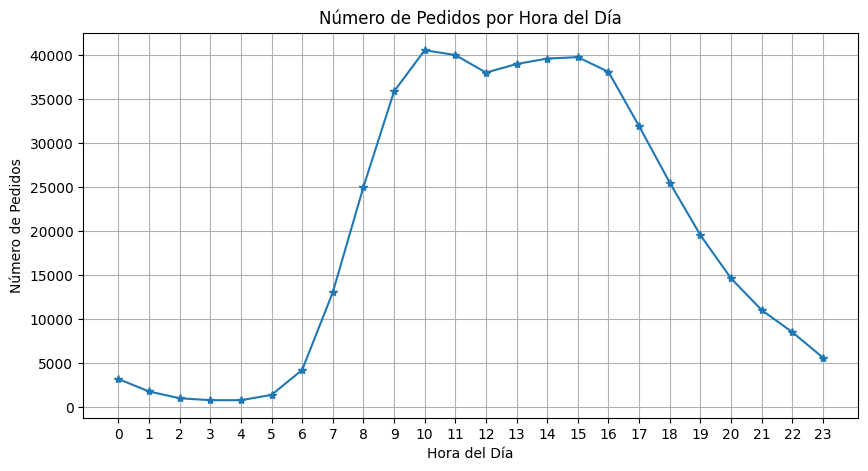

In [40]:
# Contar el número de pedidos para cada hora del día
orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(orders_per_hour.index, orders_per_hour.values, marker='*', linestyle='-')
plt.title('Número de Pedidos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(range(24))  # Establecer las etiquetas del eje x como horas del día (0-23)
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones: La representacion que tenemos nos indica que de 8:00am a 15:00pm hay una mayor cantidad de numeros de pedidos en ese momento de el dia.

### [A3] ¿Qué día de la semana compran víveres las personas?

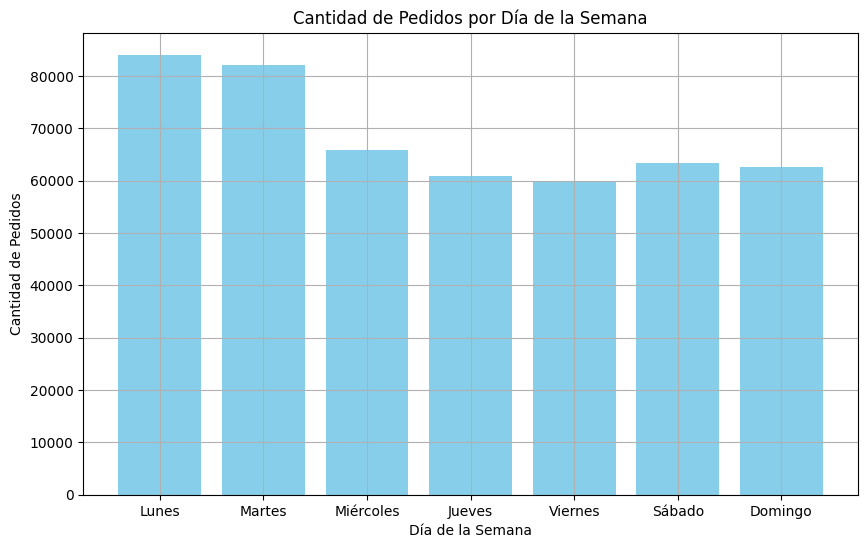

In [41]:
orders_per_dow = orders['order_dow'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(orders_per_dow.index, orders_per_dow.values, color='skyblue')
plt.title('Cantidad de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Pedidos')
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])  # Etiquetas personalizadas para los días de la semana
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones: Este cuadro nos representa que los dias lunes y martes son los dias de la semana que se han registrado mayor cantidad de productos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

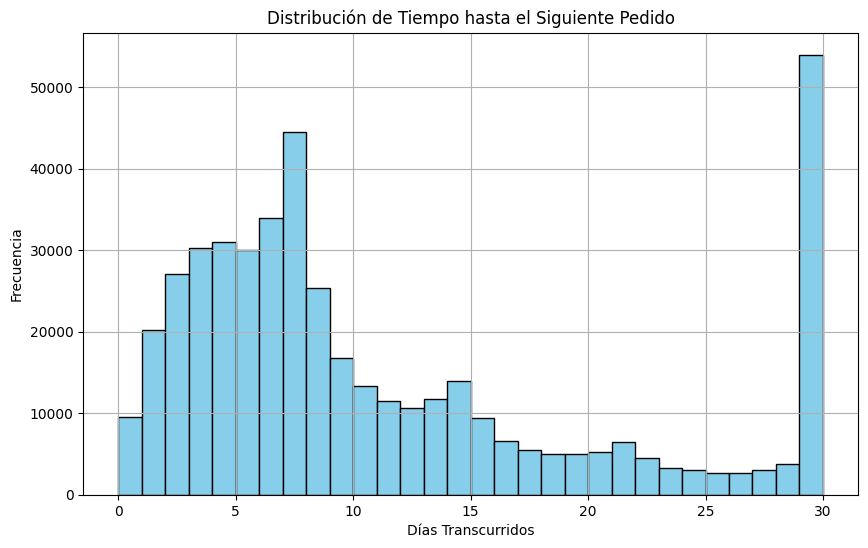

In [42]:
days_since_prior_order = orders['days_since_prior_order'].dropna()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(days_since_prior_order, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Tiempo hasta el Siguiente Pedido')
plt.xlabel('Días Transcurridos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones: La distribucion muestra una alta frecuencia de pedidos con intervalos cortos (0-10 dias), pero también una cola larga con pedidos espaciados hasta 30 dias o mas, lo que indica una variabilidad significativa en los tiempos entre pedidos.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

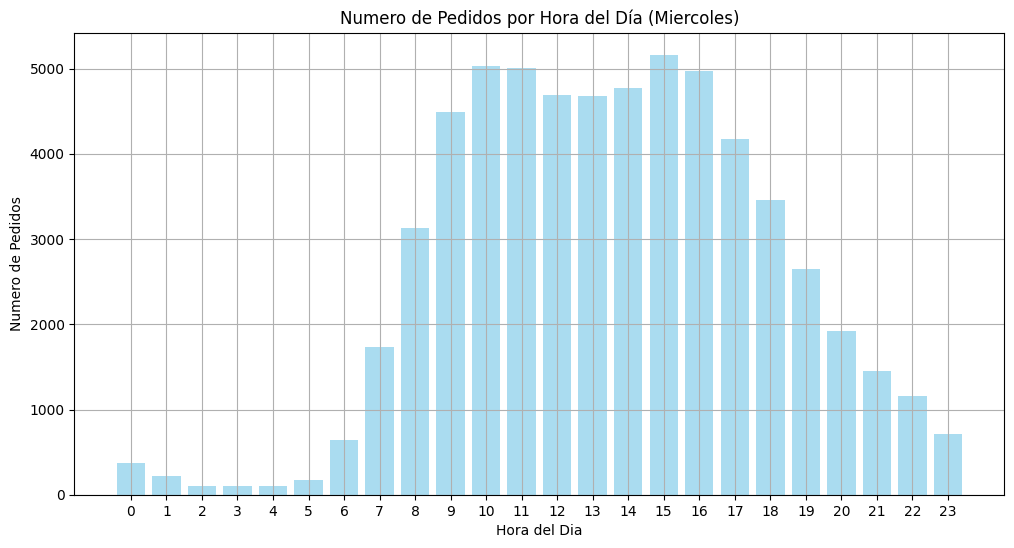

In [43]:
# Filtrar los datos para obtener solo los pedidos realizados los miercoles
orders_wednesday = orders[orders['order_dow'] == 3]
# Contar la cantidad de pedidos por hora del día para los miercoles
orders_per_hour_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()

# Crear el grafico para los pedidos realizados los miercoles
plt.figure(figsize=(12, 6))
plt.bar(orders_per_hour_wednesday.index, orders_per_hour_wednesday.values, color='skyblue', alpha=0.7)
plt.title('Numero de Pedidos por Hora del Día (Miercoles)')
plt.xlabel('Hora del Dia')
plt.ylabel('Numero de Pedidos')
plt.xticks(range(24))  
plt.grid(True)
plt.show()

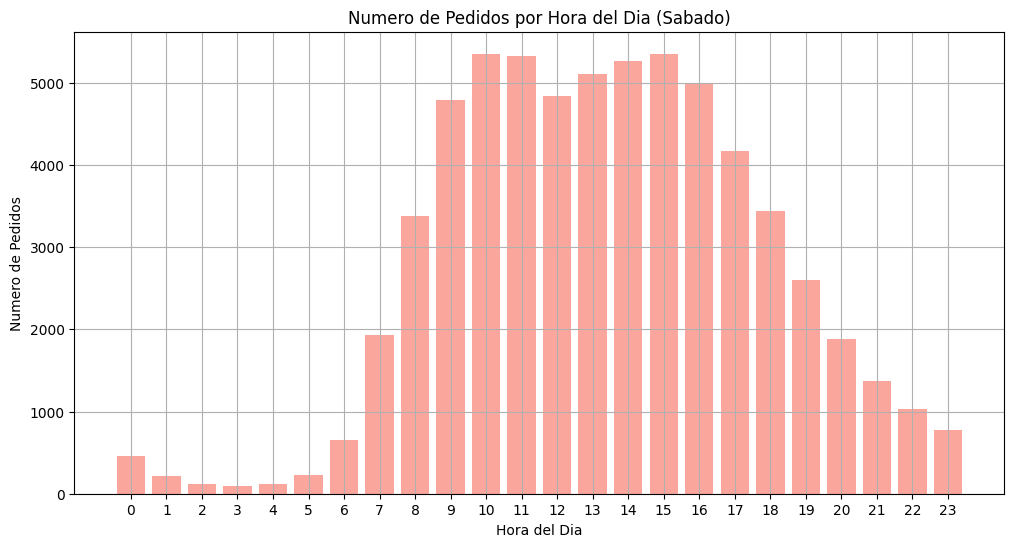

In [44]:
# Filtrar los datos para obtener solo los pedidos realizados los sabados
orders_saturday = orders[orders['order_dow'] == 5]
# Contar la cantidad de pedidos por hora del dia para los sabados
orders_per_hour_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

# Crear el grafico para los pedidos realizados los sabados
plt.figure(figsize=(12, 6))
plt.bar(orders_per_hour_saturday.index, orders_per_hour_saturday.values, color='salmon', alpha=0.7)
plt.title('Numero de Pedidos por Hora del Dia (Sabado)')
plt.xlabel('Hora del Dia')
plt.ylabel('Numero de Pedidos')
plt.xticks(range(24))  
plt.grid(True)
plt.show()

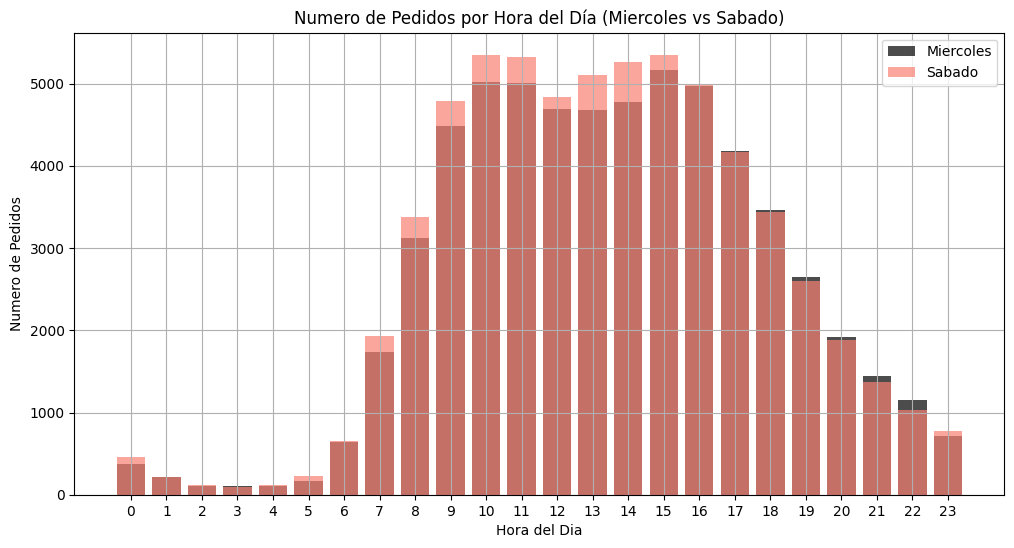

In [45]:
plt.figure(figsize=(12, 6))

# Grafico de barras para los pedidos realizados los miercoles
plt.bar(orders_per_hour_wednesday.index, orders_per_hour_wednesday.values, color='black', alpha=0.7, label='Miercoles')

# Grafico de barras para los pedidos realizados los sabados
plt.bar(orders_per_hour_saturday.index, orders_per_hour_saturday.values, color='salmon', alpha=0.7, label='Sabado')

# Configuración del titulo y etiquetas de los ejes
plt.title('Numero de Pedidos por Hora del Día (Miercoles vs Sabado)')
plt.xlabel('Hora del Dia')
plt.ylabel('Numero de Pedidos')
plt.xticks(range(24))  # Establecer las etiquetas del eje x como horas del día (0-23)
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones : podemos observar al juntar las 2 graficas que los dias sabado la mayor parte de el dia hay un mayor numero de pedidos con excepcion de el horario de 18:00 a 22:00pm 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

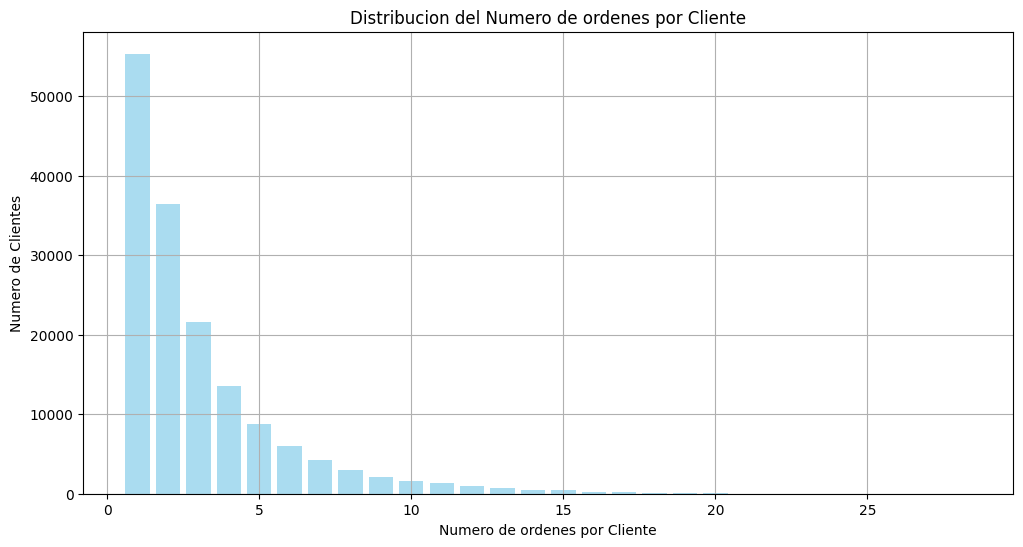

In [46]:
# Contar la cantidad de pedidos realizados por cada cliente
orders_per_user = orders['user_id'].value_counts().sort_index()

# Contar la cantidad de clientes que han realizado cada cantidad de pedidos
orders_per_user_distribution = orders_per_user.value_counts().sort_index()

# Crear el grafico de barras
plt.figure(figsize=(12, 6))
plt.bar(orders_per_user_distribution.index, orders_per_user_distribution.values, color='skyblue', alpha=0.7)

# Configuración del titulo y etiquetas de los ejes
plt.title('Distribucion del Numero de ordenes por Cliente')
plt.xlabel('Numero de ordenes por Cliente')
plt.ylabel('Numero de Clientes')

plt.grid(True)
plt.show()

Escribe aquí tus conclusiones: La distribucion del numero de ordenes por cliente muestra un patron decreciente, donde la mayoria de los clientes tienen pocas ordenes (entre 0 y 5 aproximadamente)

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:

# Crear una tabla dinámica para contar el número de veces que se ha pedido cada producto
product_counts = pd.pivot_table(order_products, index='product_id', values='order_id', aggfunc='count')

# Renombrar la columna resultante
product_counts = product_counts.rename(columns={'order_id': 'Frecuencia_pedidos'})

# Ordenar los resultados en orden descendente y seleccionar los 20 primeros productos
top_20_products = product_counts.sort_values(by='Frecuencia_pedidos', ascending=False).head(20)

# Unir esta información con el DataFrame products para obtener los nombres de los productos correspondientes
top_20_products_with_names = pd.merge(top_20_products, products, how='left', on='product_id')

# Mostrar los 20 principales productos con su identificación y nombre
print("Los 20 principales productos que se piden con más frecuencia son:")
print(top_20_products_with_names[['product_id', 'product_name', 'Frecuencia_pedidos']])

Los 20 principales productos que se piden con más frecuencia son:
    product_id              product_name  Frecuencia_pedidos
0        24852                    BANANA               66050
1        13176    BAG OF ORGANIC BANANAS               53297
2        21137      ORGANIC STRAWBERRIES               37039
3        21903      ORGANIC BABY SPINACH               33971
4        47209      ORGANIC HASS AVOCADO               29773
5        47766           ORGANIC AVOCADO               24689
6        47626               LARGE LEMON               21495
7        16797              STRAWBERRIES               20018
8        26209                     LIMES               19690
9        27845        ORGANIC WHOLE MILK               19600
10       27966       ORGANIC RASPBERRIES               19197
11       22935      ORGANIC YELLOW ONION               15898
12       24964            ORGANIC GARLIC               15292
13       45007          ORGANIC ZUCCHINI               14584
14       39275     

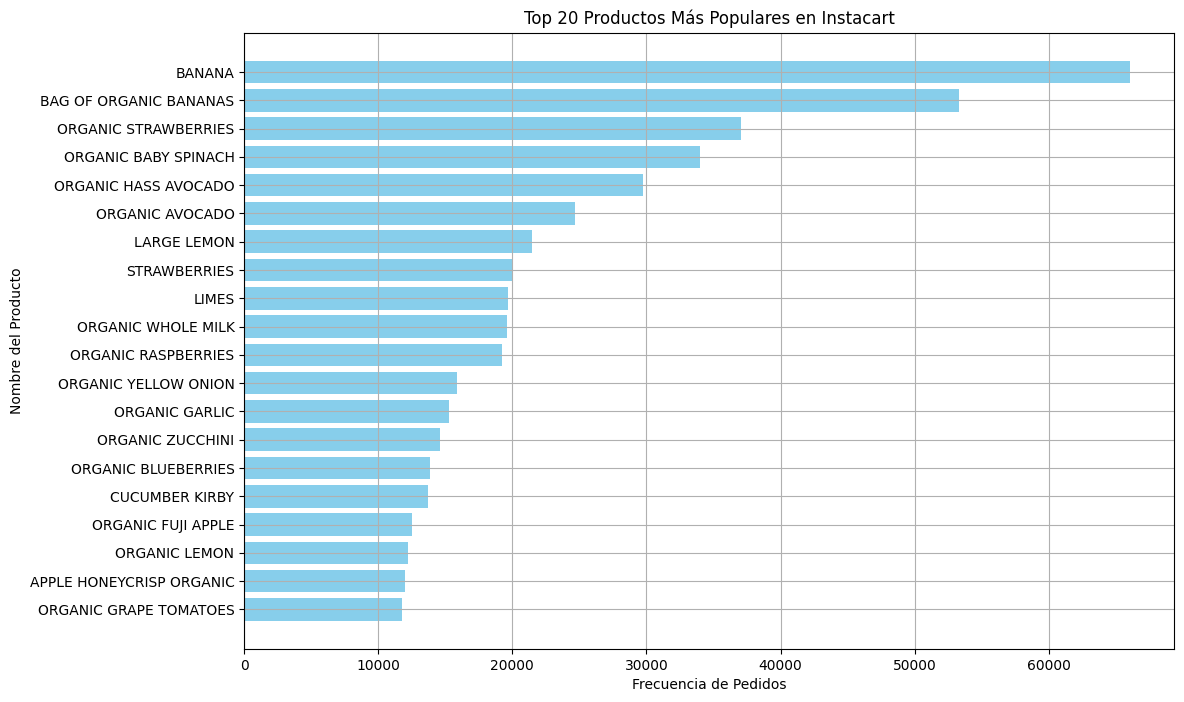

In [48]:
# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
plt.barh(top_20_products_with_names['product_name'], top_20_products_with_names['Frecuencia_pedidos'], color='skyblue')
plt.xlabel('Frecuencia de Pedidos')
plt.ylabel('Nombre del Producto')
plt.title('Top 20 Productos Más Populares en Instacart')
plt.gca().invert_yaxis()  # Invertir el eje y para que el producto más popular esté en la parte superior
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones: Como podemos ver el product BANANA es el producto el cual se a pedido mas veces con una frecuencia de 66050 pedidos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Cantidad promedio de productos por pedido: 10.098983215049127


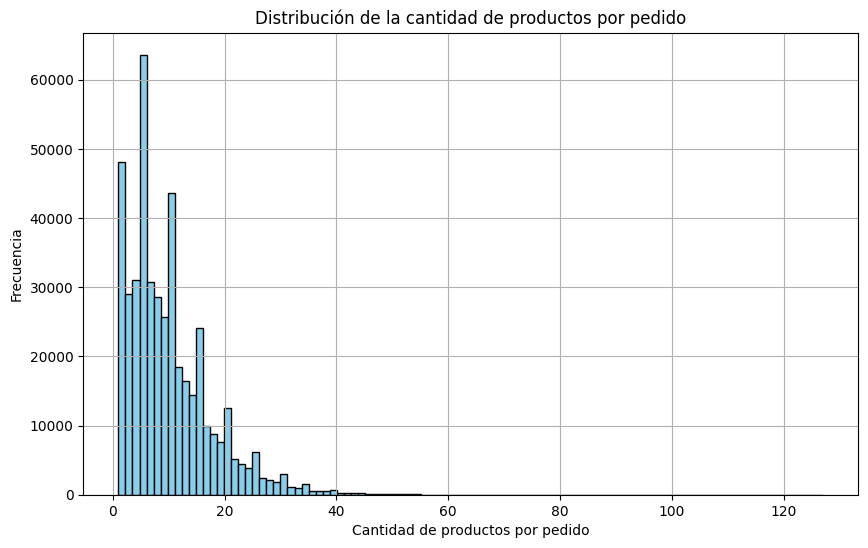

In [49]:
# Unir order_products con orders para obtener información sobre los productos en cada pedido
merged_data = pd.merge(orders, order_products, on='order_id')

# Contar la cantidad de productos por pedido
products_per_order = merged_data.groupby('order_id')['product_id'].count().reset_index()

# Calcular la cantidad promedio de productos por pedido
average_products_per_order = products_per_order['product_id'].mean()

print("Cantidad promedio de productos por pedido:", average_products_per_order)

plt.figure(figsize=(10, 6))
plt.hist(products_per_order['product_id'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribución de la cantidad de productos por pedido')
plt.xlabel('Cantidad de productos por pedido')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones : Segun el grafico y el calculo sobre cantidad promedio de productos por pedido tenemos un valor de aproximadamente 10 productos por pedido en promedio

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [50]:
# Productos que vuelven a pedirse con frecuencia
reorder_rates = order_products.groupby('product_id')['reordered'].sum().reset_index()

# Ordenar los productos por su tasa de reincidencia en orden descendente y seleccionar los 20 primeros
top_20_reorder_products = reorder_rates.sort_values(by='reordered', ascending=False).head(20)

# Unir con el DataFrame de productos para obtener los nombres de los productos
top_20_reorder_products_with_names = pd.merge(top_20_reorder_products, products, on='product_id')

print("Los 20 principales artículos que vuelven a pedirse con mayor frecuencia son:")
print(top_20_reorder_products_with_names[['product_id', 'product_name', 'reordered']])



Los 20 principales artículos que vuelven a pedirse con mayor frecuencia son:
    product_id              product_name  reordered
0        24852                    BANANA      55763
1        13176    BAG OF ORGANIC BANANAS      44450
2        21137      ORGANIC STRAWBERRIES      28639
3        21903      ORGANIC BABY SPINACH      26233
4        47209      ORGANIC HASS AVOCADO      23629
5        47766           ORGANIC AVOCADO      18743
6        27845        ORGANIC WHOLE MILK      16251
7        47626               LARGE LEMON      15044
8        27966       ORGANIC RASPBERRIES      14748
9        16797              STRAWBERRIES      13945
10       26209                     LIMES      13327
11       22935      ORGANIC YELLOW ONION      11145
12       24964            ORGANIC GARLIC      10411
13       45007          ORGANIC ZUCCHINI      10076
14       49683            CUCUMBER KIRBY       9538
15       28204        ORGANIC FUJI APPLE       8989
16        8277  APPLE HONEYCRISP ORGANI

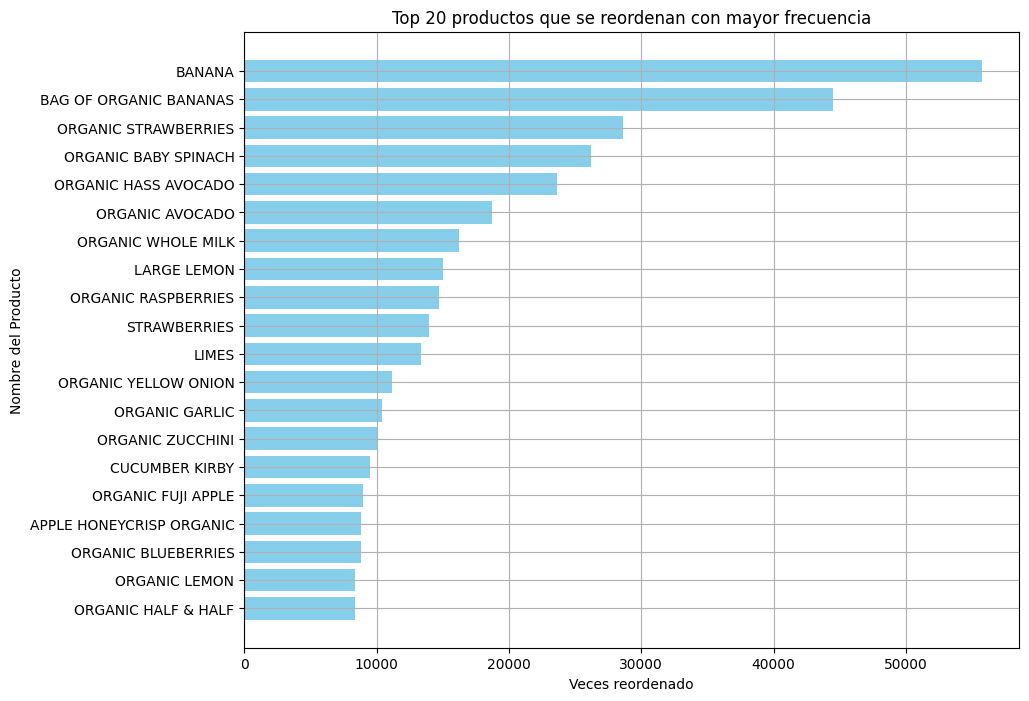

In [51]:
#Mostrar Grafico con los 20 productos
plt.figure(figsize = [10,8])
plt.title('Top 20 productos que se reordenan con mayor frecuencia')
plt.barh(top_20_reorder_products_with_names['product_name'],top_20_reorder_products_with_names['reordered'] , color = 'skyblue')
plt.xlabel('Veces reordenado')
plt.ylabel('Nombre del Producto')
plt.gca().invert_yaxis()  # Invertir el eje y para que el producto más reordenado esté en la parte superior
plt.grid(True)
plt.show()

Podemos ver que Banana es el producto el cual mas veces a sido pedido nuevamente y en la grafica podemos ver los otros 19 productos con mayor frecuencia de reorden

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [52]:
# Calcular el total de veces que cada producto se ha pedido
total_orders = order_products.groupby('product_id').size().reset_index(name='total_orders')

# Calcular el total de veces que cada producto se ha vuelto a pedir
total_reorders = order_products.groupby('product_id')['reordered'].sum().reset_index(name='total_reorders')

# Unir los DataFrames de total_orders y total_reorders
order_reorder_counts = pd.merge(total_orders, total_reorders, on='product_id')

# Calcular la proporción de las veces que se vuelve a pedir sobre el total de veces que se ha pedido para cada producto
order_reorder_counts['reorder_proportion'] = order_reorder_counts['total_reorders'] / order_reorder_counts['total_orders']

# Unir con el DataFrame de productos para obtener los nombres de los productos
order_reorder_proportions_with_names = pd.merge(order_reorder_counts, products, on='product_id')

# Mostrar el resultado
print("Proporción de reordenamiento para cada producto:")
order_reorder_proportions_with_names[['product_id', 'product_name', 'total_orders', 'total_reorders', 'reorder_proportion']]

Proporción de reordenamiento para cada producto:


,product_id,product_name,total_orders,total_reorders,reorder_proportion
0,1,CHOCOLATE SANDWICH COOKIES,280,158,0.564286
1,2,ALL-SEASONS SALT,11,0,0.000000
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,42,31,0.738095
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,49,25,0.510204
4,7,PURE COCONUT WATER WITH ORANGE,2,1,0.500000
...,...,...,...,...,...
45568,49690,HIGH PERFORMANCE ENERGY DRINK,5,4,0.800000
45569,49691,ORIGINAL PANCAKE & WAFFLE MIX,72,31,0.430556
45570,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,12,5,0.416667
45571,49693,SPRING WATER BODY WASH,25,11,0.440000


Proporcion media de todos los productos reordenados 0.38670677893645


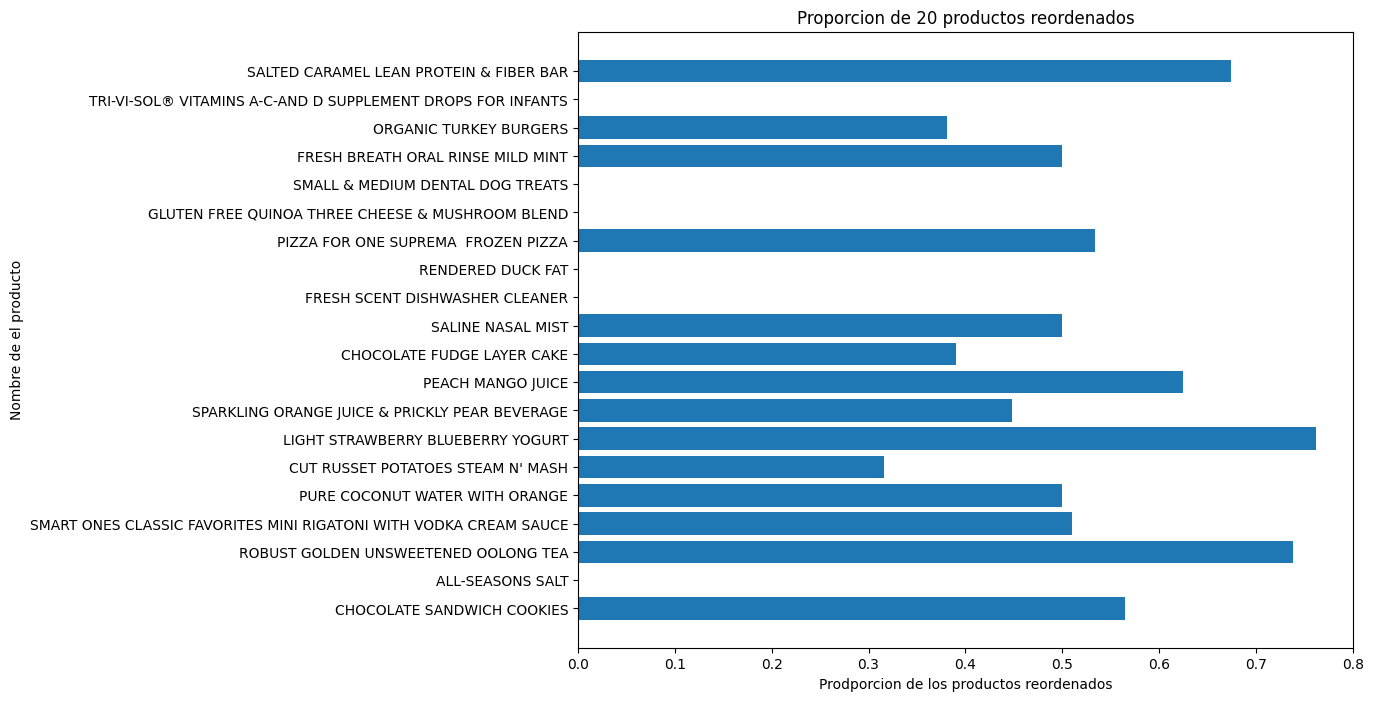

In [53]:
#grafico sobre la proporcion de los productos reordenados
mean_proportion = order_reorder_proportions_with_names['reorder_proportion'].mean()
print(f"Proporcion media de todos los productos reordenados {mean_proportion}")
o = order_reorder_proportions_with_names[['product_id', 'product_name', 'total_orders', 'total_reorders', 'reorder_proportion']].head(20)
plt.figure(figsize = [10,8])
plt.barh(o['product_name'] , o['reorder_proportion'])
plt.title('Proporcion de 20 productos reordenados')
plt.xlabel('Prodporcion de los productos reordenados')
plt.ylabel('Nombre de el producto')
plt.show()

Escribe aquí tus conclusiones : A partir de la grafica simplemente es darnos una idea de las proporciones de 20 productos que han sido reordenados y la media de proporcion de los productos reordenados es 0.38670677893645

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
# Calcular el número total de productos únicos que cada cliente ha pedido
total_products_per_user = order_products.groupby('order_id')['product_id'].nunique().reset_index(name='total_products_per_order')
total_products_per_user = pd.merge(orders[['order_id', 'user_id']], total_products_per_user, on='order_id')
total_products_per_user = total_products_per_user.groupby('user_id')['total_products_per_order'].sum().reset_index()

# Calcular el número total de productos reordenados que cada cliente ha pedido
total_reordered_per_user = order_products.groupby(['order_id', 'reordered'])['product_id'].nunique().reset_index(name='total_reorders_per_order')
total_reordered_per_user = total_reordered_per_user[total_reordered_per_user['reordered'] == 1]
total_reordered_per_user = pd.merge(orders[['order_id', 'user_id']], total_reordered_per_user, on='order_id')
total_reordered_per_user = total_reordered_per_user.groupby('user_id')['total_reorders_per_order'].sum()

# Unir los DataFrames y calcular la proporción de productos reordenados sobre el total de productos únicos para cada cliente
user_reorder_proportions = pd.merge(total_products_per_user, total_reordered_per_user, on='user_id')
user_reorder_proportions['reorder_proportion'] = user_reorder_proportions['total_reorders_per_order'] / user_reorder_proportions['total_products_per_order']

# Ordenar el DataFrame por la columna 'reorder_proportion' de menor a mayor
user_reorder_proportions_sorted = user_reorder_proportions.sort_values(by='reorder_proportion')

# Mostrar el resultado
print("Proporción de productos reordenados para cada cliente:")
user_reorder_proportions_sorted[['user_id', 'reorder_proportion']]

Proporción de productos reordenados para cada cliente:


,user_id,reorder_proportion
68493,106148,0.014925
130092,201663,0.015152
100199,155522,0.017241
37089,57630,0.017544
4778,7349,0.018182
...,...,...
75056,116344,1.000000
118491,183769,1.000000
75050,116337,1.000000
2906,4473,1.000000


Escribe aquí tus conclusiones: Podemos observar en la tabla resultante que para cada cliente, la proporción de los productos que ya había pedido va desde 0.0149 hasta 1 de tener los nombres de los usuarios se podria proporcionar una grafica la cual te muestre las proporciones de manera grafica

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [55]:
# Calcular la cantidad de veces que cada producto se añade primero al carrito
first_added_counts = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().reset_index()
first_added_counts.columns = ['product_id', 'count']

# Unir con el DataFrame de productos para obtener los nombres de los productos
top_20_first_added = pd.merge(first_added_counts.head(20), products, on='product_id')

# Mostrar los 20 principales artículos que se añaden primero al carrito
print("Los 20 principales artículos que se añaden primero al carrito son:")
top_20_first_added[['product_id', 'product_name', 'count']]

Los 20 principales artículos que se añaden primero al carrito son:


,product_id,product_name,count
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024
